In [145]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run FB-messages_data_import.ipynb
import sys
sys.path.append('../')
from Functions import * 
import copy
import random
%store -r points
%store -r random_numbers_matrix

In [146]:
def LR(x):
    return np.exp(-x/80)*0.01+0.00001

In [147]:
num_samples = 1266
alpha = 2
dim = 12

In [148]:
for s in range(len(random_numbers_matrix)):
    Y_updated = np.delete(Y, random_numbers_matrix[s].flatten().astype(int), axis=0)

    prev_grad = 100000002
    grad = 0
    n = 100000
    points_copy_prior = copy.deepcopy(points)
    grad_sum = np.zeros(n) # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 1: # stopping criteria TOG 500 MIN MED 100
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_prior_fast(i,dim,Y_updated,points_copy_prior,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points_copy_prior[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        k += 1
    

100000002
-16787342.236703657
12429131.082720619
1640511.1630288665
233141.51509969728
-64824.638577289414
-31461.851245137397
71524.25723071024
167773.42106361082
212288.67401574878
250125.879927641
297005.18321045814
312047.6530525321
299105.5311174694
263255.59101524774
218107.53604636568
182332.7352817984
154759.5507739999
96462.23563248545
16779.493458860554
2391.5631180285272
1969.2752412439877
1797.7168720000627
1648.767083855826
1517.1362890823875
1399.4468805732467
1293.701741700068
1198.345345612408
1112.119734448279
1033.9714405635605
963.0011579395032
898.4283939650159
839.566310273327
785.8041461952234
736.5960442240357
691.4546950808253
649.9477824564383
611.6952585085346
576.3660387052842
543.6735106671113
513.3699897860224
485.2406993313434
459.0979485468888
434.7760214414993
412.12702522935615
391.01770894900255
371.32711260819815
352.9448492488209
335.7698293593203
319.7092761646418
304.6779266402136
290.59735302326044
277.39536834826504
265.0054974609702
253.36650451

In [151]:
%store sigmoid_value_prior
%store points_copy_prior

Stored 'sigmoid_value_prior' (ndarray)
Stored 'points_copy_prior' (dict)


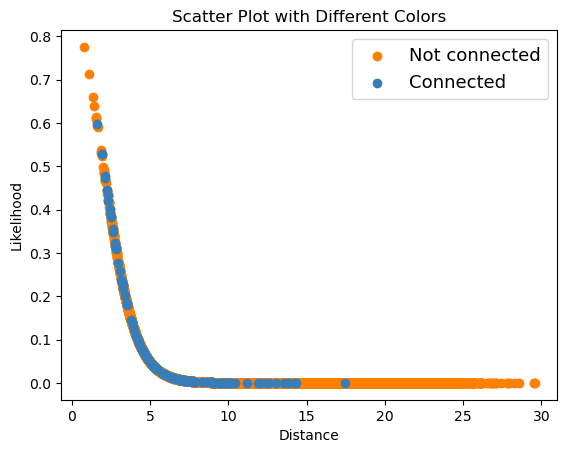

In [150]:
plt.scatter(distances[connections == -1], sigmoid_value_prior[connections == -1], color='#ff7f00', label='Not connected')
plt.scatter(distances[connections == 1], sigmoid_value_prior[connections == 1], color='#377eb8', label='Connected')
plt.xlabel('Distance')
#plt.xlim(4,5)
plt.ylabel('Likelihood')
plt.title('Scatter Plot with Different Colors')
plt.legend(fontsize=13)
plt.show()


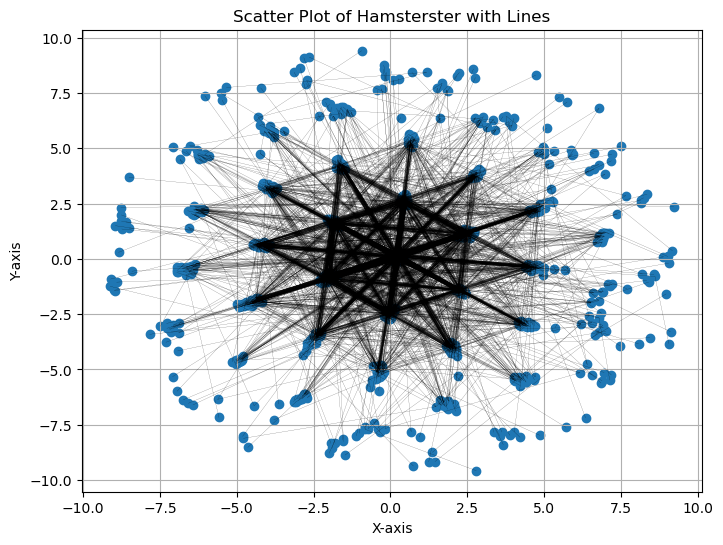

In [15]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points_copy[Y[m][1]]
        point2 = points_copy[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.1) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points_copy.values()]
y = [point[1] for point in points_copy.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Hamsterster with Lines')
plt.grid(True)
plt.show()